# Классификация текстов с использованием Наивного Байесовского Классификатора

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB

from sklearn.model_selection import GridSearchCV


## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [2]:
data = pd.read_csv(
    "data\spam_or_not_spam.zip")#, header=None, sep="\t", names=["Label", "SMS"]
# )
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
v_c = data.label.value_counts()
print(f'В данных {v_c[0]} не спам-сообщений')
print(f'В данных {v_c[1]} спам-сообщений')

В данных 2500 не спам-сообщений
В данных 500 спам-сообщений


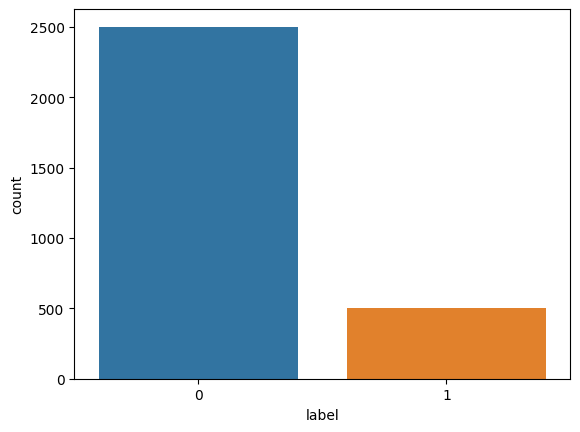

In [4]:
sns.countplot(data=data, x='label');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [5]:
# from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [6]:
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
data.dropna(inplace=True)
data.shape

(2997, 2)

Переводим данные в векторный вид:

In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [8]:
print(f'После векторизации датасет состоит из {X.shape[1]} признаков')

После векторизации датасет состоит из 34116 признаков


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [9]:
y = data.label
print(X.shape, y.shape)

(2997, 34116) (2997,)


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [11]:
print(f'Среднее значение целевой переменной равно {round(y_test.mean(), 3)}')

Среднее значение целевой переменной равно 0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [12]:
clf = ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [13]:
print('Accuracy на тестовом наборе: {:.3f}:'.format(accuracy_score(y_test, y_test_pred)))
print('f1_score на тестовом наборе: {:.3f}'.format(f1_score(y_test, y_test_pred)))
print('Precision на тестовом наборе: {:.3f}:'.format(precision_score(y_test, y_test_pred)))

Accuracy на тестовом наборе: 0.988:
f1_score на тестовом наборе: 0.962
Precision на тестовом наборе: 1.000:


In [14]:
print(classification_report(y_test, y_test_pred, digits=3))


              precision    recall  f1-score   support

           0      0.986     1.000     0.993       626
           1      1.000     0.927     0.962       124

    accuracy                          0.988       750
   macro avg      0.993     0.964     0.978       750
weighted avg      0.988     0.988     0.988       750



Нарисуйте ROC-кривую:

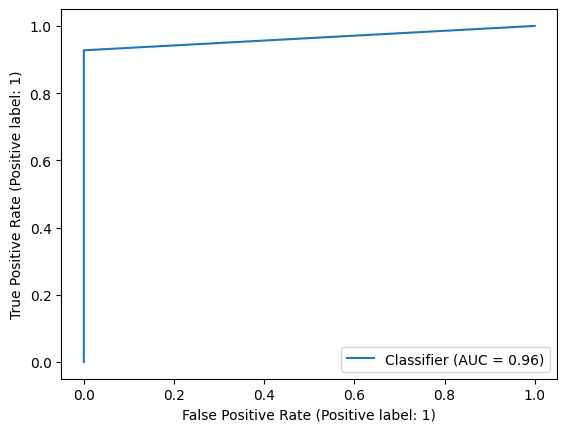

In [15]:
RocCurveDisplay.from_predictions(y_test, y_test_pred);

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [16]:
param_gs = [{'alpha': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}]

grid_search = GridSearchCV(
    estimator=ComplementNB(), 
    param_grid=param_gs,
    cv=5, 
    n_jobs = -1
)  

grid_search.fit(X_train, y_train) 
y_test_pred = grid_search.predict(X_test)

print('Accuracy на тестовом наборе: {:.3f}'.format(accuracy_score(y_test, y_test_pred)))

print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

Accuracy на тестовом наборе: 0.993
Наилучшие значения гиперпараметров: {'alpha': 0.7}


In [17]:
clf_best = ComplementNB(alpha=0.7)
clf_best.fit(X_train, y_train)

y_pred_best = clf_best.predict(X_test)

print(classification_report(y_test, y_pred_best, digits=3))

              precision    recall  f1-score   support

           0      0.994     0.998     0.996       626
           1      0.992     0.968     0.980       124

    accuracy                          0.993       750
   macro avg      0.993     0.983     0.988       750
weighted avg      0.993     0.993     0.993       750



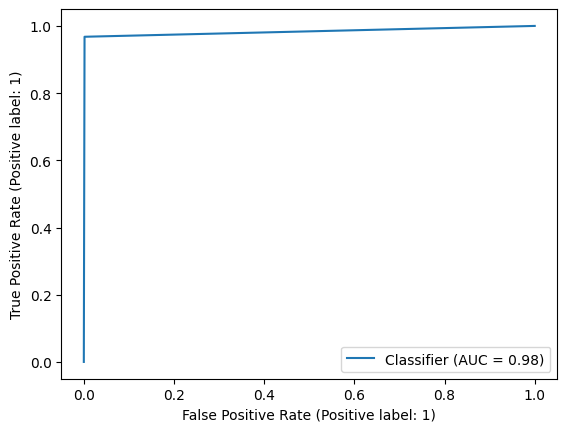

In [18]:
RocCurveDisplay.from_predictions(y_test, y_pred_best);

**Вывод**

После оптимизации $alpha$, судя по метрикам, а также $ROC-кривой$ качество модели улучшилось